In [1]:
from google.colab import files

uploaded = files.upload()

Saving India.xlsx to India.xlsx


In [ ]:
pip install PyQt5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.3 MB 4.9 MB/s 
     |████████████████████████████████| 338 kB 39.8 MB/s 
     |████████████████████████████████| 59.9 MB 91 kB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_excel('/content/India.xlsx')

In [4]:
df.dtypes

Date          object
CB Claims    float64
MP           float64
GDP G        float64
ER           float64
MP US        float64
dtype: object

ada masalah karena bentuk persenan di GDP Growth, maka dirubah agar tidak persenan

In [5]:
df['GDP G'] = df['GDP G']*100
df = df.set_index('Date')
df

,CB Claims,MP,GDP G,ER,MP US
Date,,,,,
31/03/2006,59544.000,6.500000,9.933773,94.860000,4.750000
30/06/2006,63434.000,6.583333,8.089748,92.606667,5.000000
30/09/2006,66683.000,7.000000,10.127616,92.223333,5.250000
31/12/2006,73591.000,7.250000,9.250466,94.856667,5.250000
31/03/2007,81142.000,7.500000,9.557228,95.253333,5.250000
30/06/2007,94593.000,7.750000,10.727760,101.240000,5.250000
30/09/2007,101915.000,7.750000,9.110817,101.906667,5.083333
31/12/2007,121377.000,7.750000,10.897586,100.926667,4.416667
31/03/2008,138989.000,7.750000,8.537632,98.823333,2.750000


Note: the result is P value. x affects y

In [6]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
CB Claims ::  113.76    > 60.0627   =>   True
MP     ::  61.71     > 40.1749   =>   True
GDP G  ::  26.76     > 24.2761   =>   True
ER     ::  4.79      > 12.3212   =>   False
MP US  ::  0.0       > 4.1296    =>   False


When two or more time series are cointegrated, it means they have a long run, statistically significant relationship.

This is the basic premise on which Vector Autoregression(VAR) models is based on. So, it’s fairly common to implement the cointegration test before starting to build VAR models.

In [7]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [8]:
# ADF Test on each column
for name, column in df.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "CB Claims" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.8592
 No. Lags Chosen       = 1
 Critical value 1%     = -3.548
 Critical value 5%     = -2.913
 Critical value 10%    = -2.594
 => P-Value = 0.0503. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "MP" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.9756
 No. Lags Chosen       = 3
 Critical value 1%     = -3.553
 Critical value 5%     = -2.915
 Critical value 10%    = -2.595
 => P-Value = 0.2974. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "GDP G" 
    -----------------------------------------------
 Null Hypothesis: Data has uni

In [9]:
# 1st difference
df = df.diff().dropna()

In [10]:
cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
CB Claims ::  83.11     > 60.0627   =>   True
MP     ::  43.45     > 40.1749   =>   True
GDP G  ::  23.52     > 24.2761   =>   False
ER     ::  6.96      > 12.3212   =>   False
MP US  ::  1.64      > 4.1296    =>   False


In [11]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "CB Claims" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.3464
 No. Lags Chosen       = 0
 Critical value 1%     = -3.548
 Critical value 5%     = -2.913
 Critical value 10%    = -2.594
 => P-Value = 0.0004. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "MP" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.4345
 No. Lags Chosen       = 0
 Critical value 1%     = -3.548
 Critical value 5%     = -2.913
 Critical value 10%    = -2.594
 => P-Value = 0.0003. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GDP G" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level 

In [12]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    

    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)        

,CB Claims_x,MP_x,GDP G_x,ER_x,MP US_x
CB Claims_y,1.0000,0.0004,0.0528,0.1361,0.0000
MP_y,0.0000,1.0000,0.0021,0.0268,0.0000
GDP G_y,0.0026,0.2722,1.0000,0.1293,0.0000
ER_y,0.0000,0.0000,0.0041,1.0000,0.0004
MP US_y,0.0008,0.0118,0.0000,0.1257,1.0000


In [13]:
train = df
for i in [1,2,3,4,5]:
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  17.757518048760737
BIC:  18.823264433526127

Order = 2
AIC:  18.00002616273573
BIC:  19.971391421172573

Order = 3
AIC:  17.997147480537265
BIC:  20.890507038730334

Order = 4
AIC:  18.203839692494775
BIC:  22.036021227938583

Order = 5
AIC:  17.74997892833668
BIC:  22.53827385525068



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


lags 2 most reasonable, after l2, criteria keep increase

In [14]:
result = model.fit(2)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 26, Jun, 2022
Time:                     07:57:17
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    19.9714
Nobs:                     57.0000    HQIC:                   18.7662
Log likelihood:          -862.398    FPE:                6.72907e+07
AIC:                      18.0000    Det(Omega_mle):     2.78474e+07
--------------------------------------------------------------------
Results for equation CB Claims
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const             1149.867183      1075.797067            1.069           0.285
L1.CB Claims         0.377747         0.173756            2.174           0.030
L1.MP              879.725026      3141.391888            0.

If there is any correlation left in the residuals, then, there is some pattern in the time series that is still left to be explained by the model. In that case, the typical course of action is to either increase the order of the model or induce more predictors into the system or look for a different algorithm to model the time series.

So, checking for serial correlation is to ensure that the model is sufficiently able to explain the variances and patterns in the time series.

In [15]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(result.resid)

for col, val in zip(df.columns, out):
    def adjust(val, length= 6): return str(val).ljust(length)
    print(adjust(col), ':', round(val, 2))

CB Claims : 1.98
MP     : 1.96
GDP G  : 1.99
ER     : 1.99
MP US  : 1.92


The value of this statistic can vary between 0 and 4. The closer it is to the value 2, then there is no significant serial correlation. The closer to 0, there is a positive serial correlation, and the closer it is to 4 implies negative serial correlation.

The serial correlation seems quite alright

<Figure size 640x480 with 0 Axes>

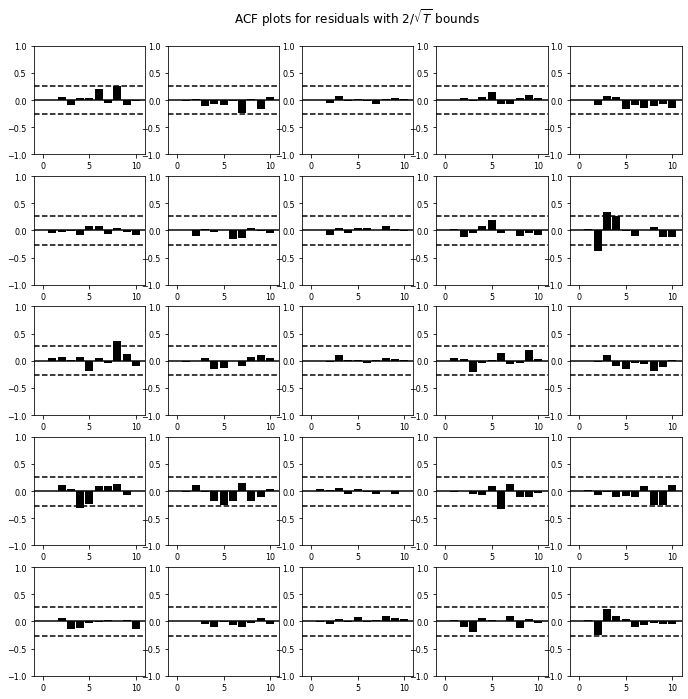

<Figure size 640x480 with 0 Axes>

In [16]:
result.plot_acorr()
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

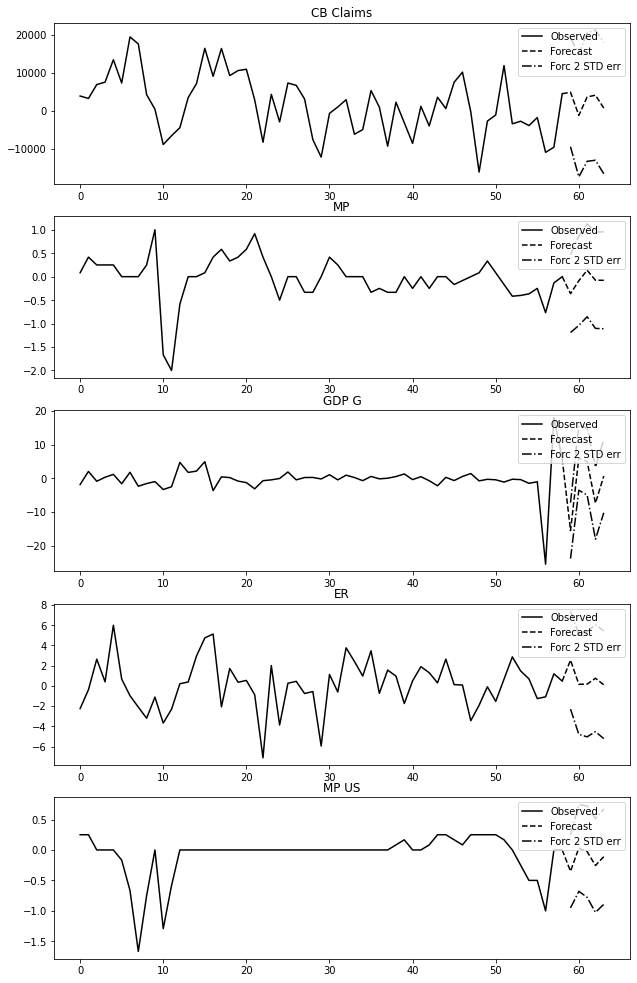

In [17]:
result.plot_forecast(5)
plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=1.5, 
                    wspace=1, 
                    hspace=0.2)

<Figure size 960x960 with 0 Axes>

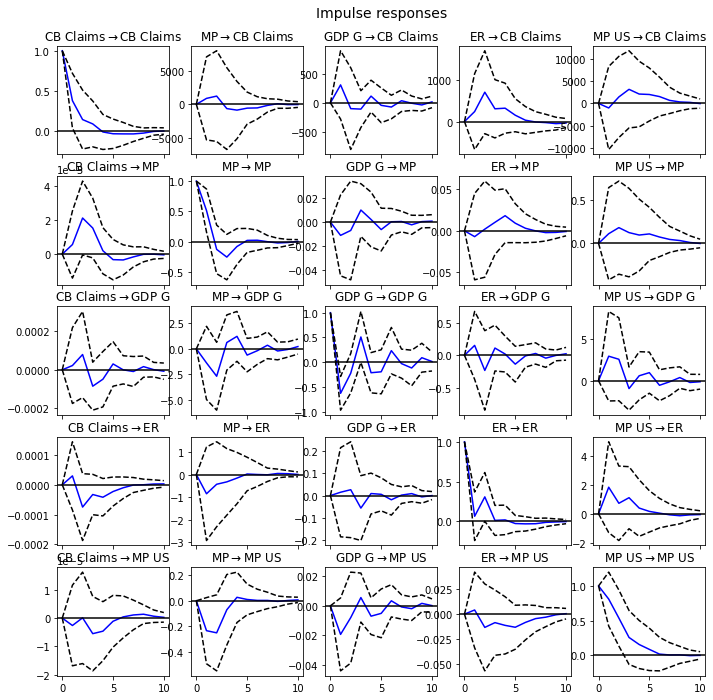

<Figure size 960x960 with 0 Axes>

In [18]:
irf = result.irf(10)
irf.plot(orth=False)
figure(figsize=(12, 12), dpi=80)

<Figure size 960x960 with 0 Axes>

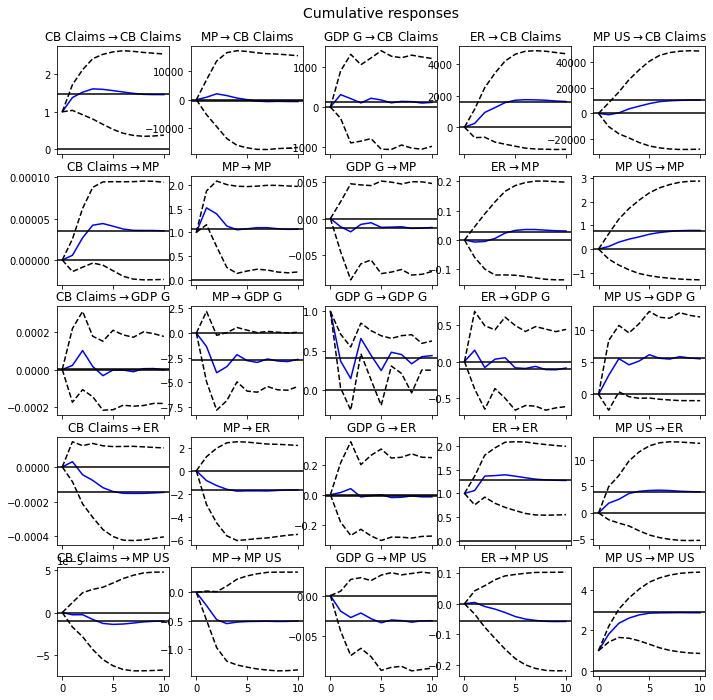

<Figure size 960x960 with 0 Axes>

In [19]:
irf.plot_cum_effects(orth=False)
figure(figsize=(12, 12), dpi=80)

In [20]:
fevd = result.fevd(10)
fevd.summary()

FEVD for CB Claims
     CB Claims        MP     GDP G        ER     MP US
0     1.000000  0.000000  0.000000  0.000000  0.000000
1     0.972702  0.002841  0.019989  0.003826  0.000643
2     0.927866  0.012380  0.018413  0.039578  0.001762
3     0.913721  0.014039  0.018105  0.046958  0.007178
4     0.897807  0.014644  0.023945  0.054192  0.009413
5     0.893603  0.015027  0.023829  0.056040  0.011502
6     0.892252  0.015010  0.024008  0.056024  0.012707
7     0.891551  0.015126  0.024456  0.055936  0.012931
8     0.891439  0.015224  0.024438  0.055920  0.012979
9     0.891128  0.015215  0.024637  0.056020  0.012999

FEVD for MP
     CB Claims        MP     GDP G        ER     MP US
0     0.113479  0.886521  0.000000  0.000000  0.000000
1     0.121979  0.869819  0.005305  0.000656  0.002241
2     0.179621  0.806329  0.005437  0.001032  0.007581
3     0.205517  0.766458  0.014877  0.003689  0.009459
4     0.205149  0.757042  0.016222  0.010830  0.010757
5     0.204791  0.753172  0.01670

<Figure size 960x960 with 0 Axes>

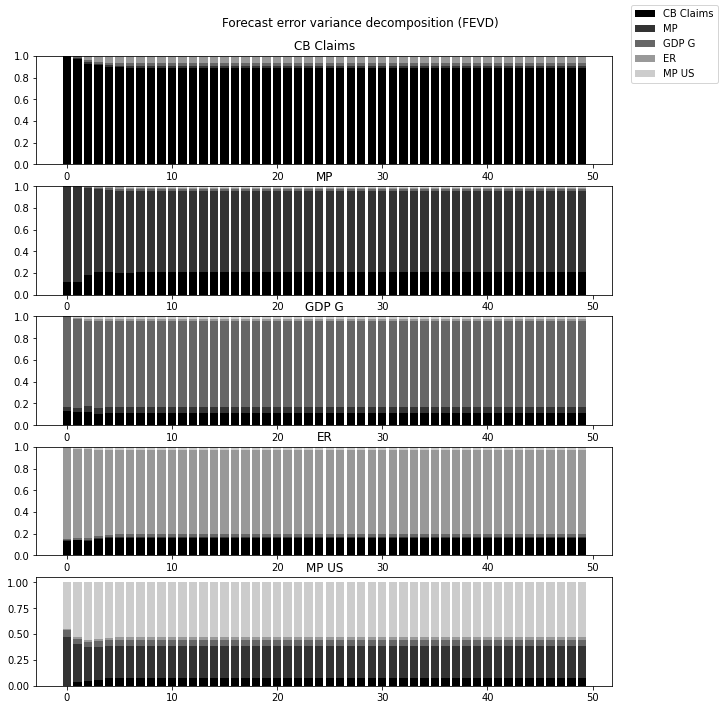

<Figure size 960x960 with 0 Axes>

In [21]:
result.fevd(50).plot()
figure(figsize=(12, 12), dpi=80)

Forecast error decomposition separates the forecast error variance into proportions attributed to each variable in the model.

Intuitively, this measure helps us judge how much of an impact one variable has on another variable in the VAR model and how intertwined our variables' dynamics are